In [2]:
from dataset import ImageDataset, load_dataset, train_val_split, data_augmentation
from model import CNN, CNNWithNAL
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# FashionMNIST0.3
## Load dataset

In [3]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.3.npz')

## Preprocessing

In [4]:
T = torch.tensor([[0.7, 0.3, 0.0],
                  [0.0, 0.7, 0.3],
                  [0.3, 0.0, 0.7]], dtype=torch.float32)

training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

train_dataset = ImageDataset(aug_training, aug_labels, transition_matrix=T)
val_dataset = ImageDataset(validation_subset, validation_sub_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [5]:
import os
if not os.path.exists('results/cnn_fashionmnist0.3_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.3")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnn_fashionmnist0.3_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 0.6421, Validation Loss: 0.6252, Validation Accuracy: 69.33%
Epoch [2/100], Training Loss: 0.6274, Validation Loss: 0.6329, Validation Accuracy: 69.31%
Epoch [3/100], Training Loss: 0.6246, Validation Loss: 0.6217, Validation Accuracy: 69.44%
Epoch [4/100], Training Loss: 0.6218, Validation Loss: 0.6228, Validation Accuracy: 69.64%
Epoch [5/100], Training Loss: 0.6199, Validation Loss: 0.6222, Validation Accuracy: 69.53%
Epoch [6/100], Training Loss: 0.6191, Validation Loss: 0.6292, Validation Accuracy: 69.06%
Epoch [7/100], Training Loss: 0.6190, Validation Loss: 0.6229, Validation Accuracy: 69.56%
Epoch [8/100], Training Loss: 0.6170, Validation Loss: 0.6802, Validation Accuracy: 68.58%
Epoch [9/100], Training Loss: 0.6179, Validation Loss: 0.6298, Validation Accuracy: 69.36%
Epoch [10/100], Training Loss: 0.6179, Validation Loss: 0.6270, Validation Accuracy: 69.33%
Epoch [11/100], Training Loss: 0.6164, Valida

## CNN with Noise Adaption Layer Training

In [6]:
if not os.path.exists('results/cnnwithnal_fashionmnist0.3_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNNWithNAL(num_classes=3, dataset_name="FashionMNIST0.3")
        cnn.train(train_dataset, val_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnnwithnal_fashionmnist0.3_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 0.6702, Validation Loss: 0.6332, Validation Accuracy: 69.61%
Epoch [2/100], Training Loss: 0.6363, Validation Loss: 0.6348, Validation Accuracy: 69.31%
Epoch [3/100], Training Loss: 0.6281, Validation Loss: 0.6516, Validation Accuracy: 69.36%
Epoch [4/100], Training Loss: 0.6222, Validation Loss: 0.6472, Validation Accuracy: 69.39%
Epoch [5/100], Training Loss: 0.6126, Validation Loss: 0.6684, Validation Accuracy: 63.67%
Epoch [6/100], Training Loss: 0.6004, Validation Loss: 0.6684, Validation Accuracy: 68.67%
Epoch [7/100], Training Loss: 0.5751, Validation Loss: 0.6857, Validation Accuracy: 68.36%
Epoch [8/100], Training Loss: 0.5214, Validation Loss: 0.7610, Validation Accuracy: 62.78%
Epoch [9/100], Training Loss: 0.4266, Validation Loss: 0.9506, Validation Accuracy: 61.53%
Epoch [10/100], Training Loss: 0.3174, Validation Loss: 1.1604, Validation Accuracy: 59.33%
Epoch [11/100], Training Loss: 0.2297, Valida

# Visualisation

/tmp/ipykernel_7672/4284851602.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_03, cnnwithnal_acc_03], labels=models)


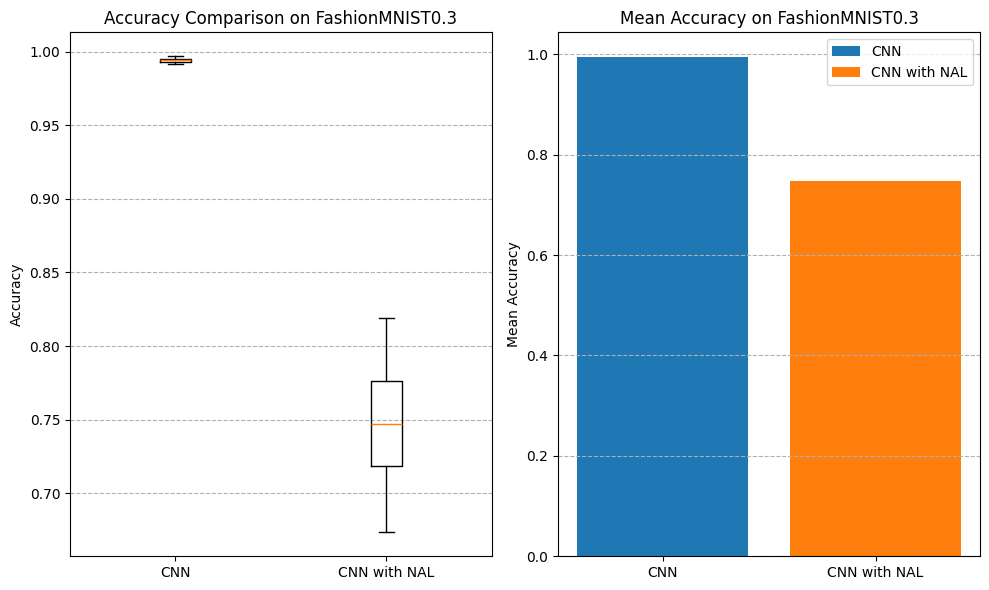

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnn_acc_03 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_03 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_03, cnnwithnal_acc_03], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.3')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_03), np.mean(cnnwithnal_acc_03)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.3')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.show()


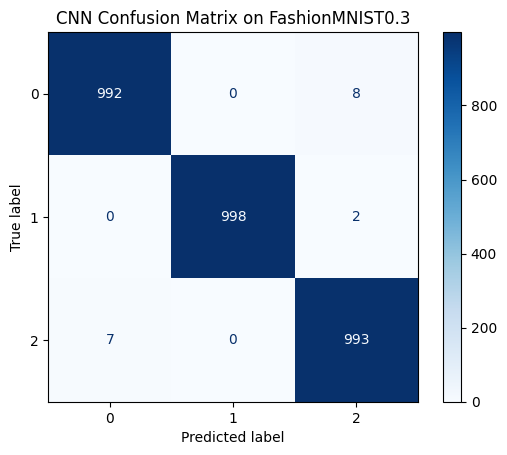

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
with open('results/cnn_fashionmnist0.3_pred_results.pkl', 'rb') as f:
    cnn_pred_results_03 = pickle.load(f)
y_true = cnn_pred_results_03[0][0]
y_pred = cnn_pred_results_03[0][1]
cm = confusion_matrix(y_true, y_pred)
confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
confusion_disp.plot(cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix on FashionMNIST0.3')
plt.show()